<a href="https://colab.research.google.com/github/Vigneshkumarcvk/Final-Project-GUVI/blob/main/Project_1_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Loading Data

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.shape

(45211, 11)

In [ ]:
 df['job'].nunique(),df['marital'].nunique(),df['education_qual'].nunique(),df['call_type'].nunique(),df['prev_outcome'].nunique(),df['mon'].nunique(),df['day'].nunique(),df['num_calls'].nunique()

(12, 3, 4, 3, 4, 12, 31, 48)

In [ ]:
df.job.unique(),df.prev_outcome.unique(), df.marital.unique(),df.education_qual.unique(),df.call_type.unique(),df.mon.unique()

(array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 array(['unknown', 'failure', 'other', 'success'], dtype=object),
 array(['married', 'single', 'divorced'], dtype=object),
 array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 array(['unknown', 'cellular', 'telephone'], dtype=object),
 array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object))

In [ ]:
df.age.unique(),df.num_calls.unique(),df.day.unique(),df.dur.unique()

(array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
        25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
        27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
        69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
        95, 81, 18, 89, 84, 87, 92, 93, 88]),
 array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
        32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
        20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44]),
 array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
        29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31]),
 array([ 261,  151,   76, ..., 1298, 1246, 1556]))

In [ ]:
df.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [ ]:
df.value_counts()

age  job          marital  education_qual  call_type  day  mon  dur  num_calls  prev_outcome  y 
29   admin.       single   secondary       unknown    2    jun  121  4          unknown       no    2
39   blue-collar  married  primary         unknown    19   jun  112  4          unknown       no    2
36   management   married  tertiary        cellular   8    aug  75   2          unknown       no    2
34   services     married  secondary       unknown    28   may  124  1          unknown       no    2
36   blue-collar  married  secondary       cellular   9    jul  183  1          unknown       no    2
                                                                                                   ..
35   admin.       married  secondary       cellular   13   may  249  2          failure       no    1
                                                      14   may  125  1          failure       no    1
                                                                171  4          unknown

In [ ]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [ ]:
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [ ]:
df['job'] = df['job'].replace('unknown',df['job'].mode()[0])

In [ ]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
df["call_type"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [ ]:
df["education_qual"] = df["education_qual"].replace("unknown",df["education_qual"].mode()[0])

In [ ]:
df["education_qual"].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df['Target'] = df['y'].map({'yes':1, 'no':0})

In [ ]:
df.groupby('prev_outcome')['Target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091615
Name: Target, dtype: float64

In [ ]:
IQR = df['num_calls'].quantile(0.75)-df['num_calls'].quantile(0.25)
upper = df.num_calls.quantile(0.75) + (1.5*IQR)
lower = df.num_calls.quantile(0.25) + (1.5*IQR)
upper,lower

(6.0, 4.0)

In [ ]:
df.num_calls = df.num_calls.clip(upper, lower)

In [ ]:
IQR = df['dur'].quantile(0.75)-df['dur'].quantile(0.25)
upper = df.dur.quantile(0.75) + (1.5*IQR)
lower = df.dur.quantile(0.25) + (1.5*IQR)
upper,lower

(643.0, 427.0)

In [ ]:
df.dur = df.dur.clip(upper, lower)

In [ ]:
df.describe()

,age,day,dur,num_calls,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,450.297251,4.231669,0.116985
std,10.618762,8.322476,62.029167,0.608818,0.321406
min,18.000000,1.000000,427.000000,4.000000,0.000000
25%,33.000000,8.000000,427.000000,4.000000,0.000000
50%,39.000000,16.000000,427.000000,4.000000,0.000000
75%,48.000000,21.000000,427.000000,4.000000,0.000000
max,95.000000,31.000000,643.000000,6.000000,1.000000


In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58,management,married,tertiary,unknown,5,may,427.0,4.0,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,427.0,4.0,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,427.0,4.0,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,427.0,4.0,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,427.0,4.0,unknown,no,0


EDA

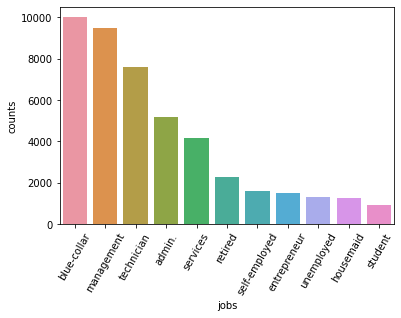

In [ ]:
df_job = pd.DataFrame(df.job.value_counts()).sort_values('job', ascending = False).reset_index()
df_job.rename(columns = {"index":"jobs","job":"counts"},inplace = True)
bar = sns.barplot(x =df_job["jobs"],y=df_job["counts"],data = df_job)
bar.tick_params(axis='x',rotation = 60)

<AxesSubplot:ylabel='job'>

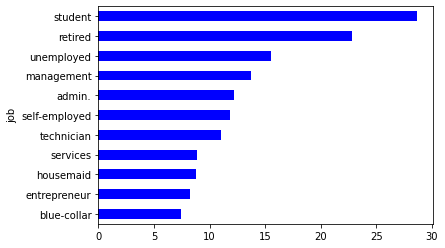

In [ ]:
(df.groupby("job")['Target'].mean()*100).sort_values().plot(kind = 'barh', color = 'blue')

<AxesSubplot:ylabel='education_qual'>

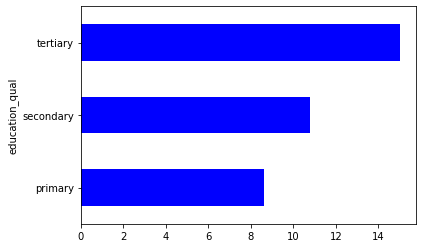

In [ ]:
(df.groupby("education_qual")['Target'].mean()*100).sort_values().plot(kind = 'barh', color = 'blue')

<AxesSubplot:ylabel='marital'>

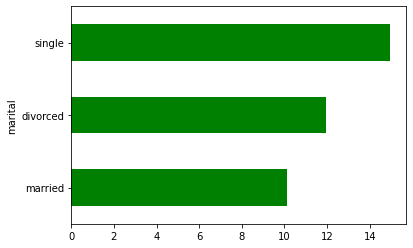

In [ ]:
(df.groupby("marital")['Target'].mean()*100).sort_values().plot(kind = 'barh', color = 'green')

<AxesSubplot:ylabel='call_type'>

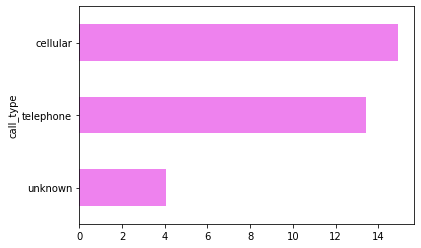

In [ ]:
(df.groupby("call_type")['Target'].mean()*100).sort_values().plot(kind = 'barh', color = 'violet')

<AxesSubplot:ylabel='mon'>

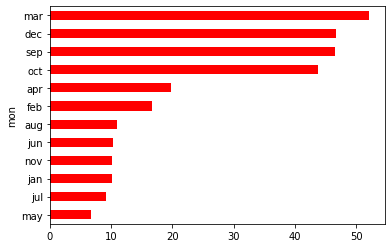

In [ ]:
(df.groupby("mon")['Target'].mean()*100).sort_values().plot(kind = 'barh', color = 'red')

<AxesSubplot:ylabel='prev_outcome'>

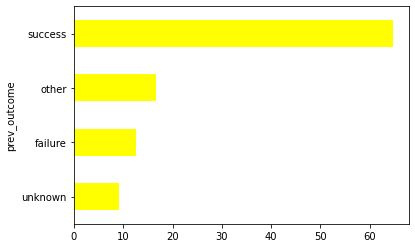

In [ ]:
(df.groupby("prev_outcome")['Target'].mean()*100).sort_values().plot(kind = 'barh', color = 'yellow')

Encoding

In [ ]:
colmn = df['job'].unique()
K = []
for i in colmn:
   k = len(df[df['job']==i][df['y']=='yes'])/len(df[df['job']==i])
   K.append(k)
df1 = pd.DataFrame({'job':colmn,"%":K}) 
df1 = df1.sort_values("%",ascending = True)
df1 = df1.reset_index()
del df1["index"]
df1

<ipython-input-1054-48c5f16e1747>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k = len(df[df['job']==i][df['y']=='yes'])/len(df[df['job']==i])


,job,%
0,blue-collar,0.074052
1,entrepreneur,0.082717
2,housemaid,0.087903
3,services,0.088830
4,technician,0.110570
5,self-employed,0.118429
6,admin.,0.122027
7,management,0.137556
8,unemployed,0.155027
9,retired,0.227915


In [ ]:
df['job'] = df['job'].map({df1['job'][0]: 0, df1['job'][1]: 1, df1['job'][2]: 2, df1['job'][3]: 3, df1['job'][4]: 4, df1['job'][5]: 5, df1['job'][6]: 6, df1['job'][7]: 7, df1['job'][8]: 8, df1['job'][9]: 9, df1['job'][10]: 10})

In [ ]:
colmn = df['marital'].unique()
K = []
for i in colmn:
   k = len(df[df['marital']==i][df['y']=='yes'])/len(df[df['marital']==i])
   K.append(k)
df1 = pd.DataFrame({'marital':colmn,"%":K}) 
df1 = df1.sort_values("%",ascending = True)
df1 = df1.reset_index()
del df1["index"]
df1

<ipython-input-1056-d560fbb30d8a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k = len(df[df['marital']==i][df['y']=='yes'])/len(df[df['marital']==i])


,marital,%
0,married,0.101235
1,divorced,0.119455
2,single,0.149492


In [ ]:
df['marital'] = df['marital'].map({df1['marital'][0]: 0, df1['marital'][1]: 1, df1['marital'][2]: 2})

In [ ]:
colmn = df['education_qual'].unique()
K = []
for i in colmn:
   k = len(df[df['education_qual']==i][df['y']=='yes'])/len(df[df['education_qual']==i])
   K.append(k)
df1 = pd.DataFrame({'education_qual':colmn,"%":K}) 
df1 = df1.sort_values("%",ascending = True)
df1 = df1.reset_index()
del df1["index"]
df1

<ipython-input-1058-25549126b881>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k = len(df[df['education_qual']==i][df['y']=='yes'])/len(df[df['education_qual']==i])


,education_qual,%
0,primary,0.086265
1,secondary,0.107826
2,tertiary,0.150064


In [ ]:
df['education_qual'] = df['education_qual'].map({df1['education_qual'][0]: 0, df1['education_qual'][1]: 1, df1['education_qual'][2]: 2})

In [ ]:
colmn = df['call_type'].unique()
K = []
for i in colmn:
   k = len(df[df['call_type']==i][df['y']=='yes'])/len(df[df['call_type']==i])
   K.append(k)
df1 = pd.DataFrame({'call_type':colmn,"%":K}) 
df1 = df1.sort_values("%",ascending = True)
df1 = df1.reset_index()
del df1["index"]
df1

<ipython-input-1060-a08a33380476>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k = len(df[df['call_type']==i][df['y']=='yes'])/len(df[df['call_type']==i])


,call_type,%
0,unknown,0.040707
1,telephone,0.134205
2,cellular,0.149189


In [ ]:
df['call_type'] = df['call_type'].map({df1['call_type'][0]: 0, df1['call_type'][1]: 1, df1['call_type'][2]: 2})

In [ ]:
colmn = df['prev_outcome'].unique()
K = []
for i in colmn:
   k = len(df[df['prev_outcome']==i][df['y']=='yes'])/len(df[df['prev_outcome']==i])
   K.append(k)
df1 = pd.DataFrame({'prev_outcome':colmn,"%":K}) 
df1 = df1.sort_values("%",ascending = True)
df1 = df1.reset_index()
del df1["index"]
df1

<ipython-input-1062-28d6e513d213>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k = len(df[df['prev_outcome']==i][df['y']=='yes'])/len(df[df['prev_outcome']==i])


,prev_outcome,%
0,unknown,0.091615
1,failure,0.126097
2,other,0.166848
3,success,0.647253


In [ ]:
df['prev_outcome'] = df['prev_outcome'].map({df1['prev_outcome'][0]: 0, df1['prev_outcome'][1]: 1, df1['prev_outcome'][2]: 2, df1['prev_outcome'][3]: 3})

In [ ]:
colmn = df['mon'].unique()
K = []
for i in colmn:
   k = len(df[df['mon']==i][df['y']=='yes'])/len(df[df['mon']==i])
   K.append(k)
df1 = pd.DataFrame({'mon':colmn,"%":K}) 
df1 = df1.sort_values("%",ascending = True)
df1 = df1.reset_index()
del df1["index"]
df1

<ipython-input-1064-223c97f08ff8>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k = len(df[df['mon']==i][df['y']=='yes'])/len(df[df['mon']==i])


,mon,%
0,may,0.067195
1,jul,0.090935
2,jan,0.101212
3,nov,0.101511
4,jun,0.102228
5,aug,0.110133
6,feb,0.166478
7,apr,0.196794
8,oct,0.437669
9,sep,0.464594


In [ ]:
df['mon'] = df['mon'].map({df1['mon'][0]: 0, df1['mon'][1]: 1, df1['mon'][2]: 2, df1['mon'][3]: 3, df1['mon'][4]: 4, df1['mon'][5]: 5, df1['mon'][6]: 6, df1['mon'][7]: 7, df1['mon'][8]: 8, df1['mon'][9]: 9, df1['mon'][10]: 10, df1['mon'][11]:11})

In [ ]:
colmn = df['y'].unique()
K = []
for i in colmn:
   k = len(df[df['y']==i][df['y']=='yes'])/len(df[df['y']==i])
   K.append(k)
df1 = pd.DataFrame({'y':colmn,"%":K}) 
df1 = df1.sort_values("%",ascending = True)
df1 = df1.reset_index()
del df1["index"]
df1

<ipython-input-1066-f55439dd517c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k = len(df[df['y']==i][df['y']=='yes'])/len(df[df['y']==i])


,y,%
0,no,0.0
1,yes,1.0


In [ ]:
df['y'] = df['y'].map({df1['y'][0]: 0, df1['y'][1]: 1})

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,Target
0,58,7,0,2,0,5,0,427.0,4.0,0,0,0
1,44,4,2,1,0,5,0,427.0,4.0,0,0,0
2,33,1,0,1,0,5,0,427.0,4.0,0,0,0
3,47,0,0,1,0,5,0,427.0,4.0,0,0,0
4,33,0,2,1,0,5,0,427.0,4.0,0,0,0


Splitting

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45211 non-null  int64  
 1   job             45211 non-null  int64  
 2   marital         45211 non-null  int64  
 3   education_qual  45211 non-null  int64  
 4   call_type       45211 non-null  int64  
 5   day             45211 non-null  int64  
 6   mon             45211 non-null  int64  
 7   dur             45211 non-null  float64
 8   num_calls       45211 non-null  float64
 9   prev_outcome    45211 non-null  int64  
 10  y               45211 non-null  int64  
 11  Target          45211 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 4.1 MB


In [ ]:
df.shape

(45211, 12)

In [ ]:
col = [*df.columns]
col[:-2]

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome']

In [ ]:
x = df.loc[:,col[:-2]].values
y = df.loc[:, col[:-1]].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25) 

Balancing the Data

In [ ]:
df.shape

(45211, 12)

In [ ]:
len(x_train),len(y_train)

(33908, 33908)

In [ ]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy="all")


In [ ]:
x_smt, y_smt = smt.fit_resample(x_train, y_train)

ValueError: ignored

In [ ]:
len(x_smt),len(y_smt)

In [ ]:
df_bal = pd.DataFrame(x_smt, columns = df.columns[:-2])

In [ ]:
df_bal['y'] = y_smt

In [ ]:
len(df_bal[df_bal["y"]==1])/len(df_bal)

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [ ]:
x_train

In [ ]:
x_test

Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import xgboost as xgp

In [ ]:

from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
LR.score(x_test, y_test)
lr = roc_auc_score(y_test, LR.predict_proba(x_test)[:, 1])

In [ ]:
'''for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60]
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_test)
print('K-value:' i, "Accurancy Score:", KNN>score(x_train,y_smt), 'Cross-Val Score:', np.mean(cross_val_score(KNN,x_train, y_)smt, cv =10)))'''

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fot(x_train,y_smt)
KNN.score(x_test, y_test)
k = roc_auc_score(y_test, KNN.predict_proba(x_test)[:, 1])

In [ ]:
dt = DecisionTreeClassifier(max_depth = 10)
df.fit(x_train, y_smt)
dt.score(x_test, y_test)
d = roc_auc_score(y_test, dt.predict_proba(x_test)[:, 1]) 

In [ ]:
cm =(y_test, dtt.predict(x_test))


In [ ]:
rf = RandomForestClassifier(n_estimatorss = 100, max_depth = 4, max_features = 'sqrt')
rt.fit(x_train, y_smt)

In [ ]:
roc = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])

In [ ]:
for LR in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25]
xg = xgb.XGBClassifier(learning_tate = lr, n_estimator = 100, verbosity = 0)
xg.score(x_train, y_smt)
xg.score(x_test, y_test)

In [ ]:
print("LR:", lr, "Train_Score:", xg.score(x_train,y_smt), "CV:", np.mean(cross_val_score(KNN,x_train, y_)smt, cv =10))),cm =(y_test, dtt.predict(x_test)))

Evaluation

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree
m1 = LogisticRegression(random_state = 15)
m2 = KNeighborsClassifier(5)
m3 = tree.DecisionTreeClassifier(random_state = 15)
m4 = xgb.XGBClassifier(learning_rate = 0.75, n_estimator = 100, verbosity = 0)
m5 = RandomForestClassifier(n_estimator  = 100, max_depth = 5, max_features = 'sqrt')
m = VotingClassifier(estimators = [('lr',ml),('dt',m2),('knn',m3),('xgb',m4), ('rf',m5)], voting = 'soft')

In [ ]:
m.fit(x_train, y_smt)
y_pred = m.predict(x_test)
v = voc_auc_score(y_test,m.predict_proba(x_test)[:, 1])


In [ ]:
pd.DataFrame({'Model':["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost", "Voting Classifier"]}), "AUROC":[log(y_test, [:, 1])]